# Método de Euler para aproximar solucines  de una ecuación diferencial

**Recordar metodo de Euler**

Suponga que queremos resolver numericamente el porblema de valor inicial

$$\dfrac{d y(t)}{dt} = f(t,y), \quad \text{con } y(0) := c.$$

Utilizando el metodo de Euler podemos aproximar la funcion $y_i = y(t_i)$ envaluada en una sucesion de tiempos $t_{i}$ mediante la formula (diferencias finitas)

$$ y_{i+1} = y_{i} + f(t_i,y_i)  \  dt $$

donde $dt := t_{i+1} - t_{i}$





**Ejemplo**

Ciertos elementos (denominados radiactivos) son inestables y en un intervalo de tiempo dado, una fracción fija de átomos se desintegra espontáneamente formando así un nuevo elemento. El anterior fenomoe se puede modelarse mediante la siguiente ecuación diferencial 

$$ \dfrac{d N}{dt} = -\lambda N $$

Donde $N$ es la cantidad de atomos presentes de un cierto elemento, $\lambda$ es la constante (positiva) de decaimiento radiactivo y $t$ es el tiempo medido en segundos. Suponiendo que inicialmente se tenian 10^8 atomos de y que la constante de decaimiento es de $0.05$ realice:

- Un grafico de la funcion $N$ en el tiempo.

- Aproxime el numero de atomos de ese elemento radiactivo que estaran presentes despues de $4$ horas. 

**Solución**

Usando un ciclo for:

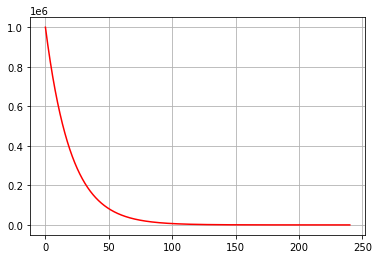

In [133]:
#importamos las librerias de numpy

import numpy as np
import matplotlib.pyplot as plt


Lambda = 0.05

#Defino la función
def f(t, y):
  return -Lambda * y


#PARAMETROS
t0 = 0
tf = 240 #Segundos por hora!
dt = 0.01


#lista de tiempos  
t = np.arange(t0,tf,dt)


#Numero de tiempos
N = len(t)


#lista los valores de la función
y = np.zeros_like(t)

#asigno el valor inicial
y[0] =  10**6 


#Aplicamos la formula de Euler
for i in range( N-1 ):
    y[i+1] = y[i] +  dt* f(t[i],y[i])
    

plt.plot(t, y,'-r')
plt.grid()
plt.show()

In [96]:
#Valor en 4 horas = 240 segundos!

print("El numero de atomos presente en 4 horas es: ", y[-1])



El numero de atomos presente en 4 horas es:  6.128865642314465


**Comparando con la solucion exacta**

La solución exacta del problema de la EDO es:

$$N = N_0 \ e^{-\lambda t}$$

Por lo tanto:

In [84]:
def exacta(t):    
    return y[0] * np.exp(- Lambda * t)

Comparando los graficos y obteniendo errores:

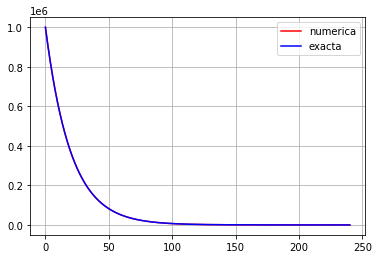

In [92]:
plt.plot(t,          y,'-r', label='numerica')
plt.plot(t, exacta(t),'-b', label='exacta')
plt.grid()
plt.legend()
plt.show()

- Calculando la diferencia

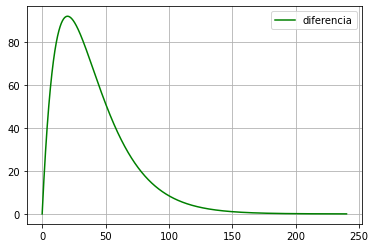

In [93]:
plt.plot(t, np.abs( exacta(t) - y )  ,'-g', label='diferencia') 
plt.grid()
plt.legend()
plt.show()

- Mostrando la diferencia en escala logaritmica (es mas adecuado)

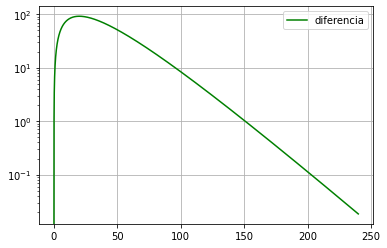

In [103]:
plt.plot(t, np.abs( exacta(t) - y )  ,'-g', label='diferencia') 
plt.yscale('log')
plt.grid()
plt.legend()
plt.show()

Enfatize en el hecho de que el metodo de Euler es de orden $dt$ y la derivada de la funcion y por lo tanto depende del tamaño de estos (es fundamentaltener idea de esto). Corra el grafico del error para varios valores de $dt$ y observe como se reduce la diferencia de la solucion exacta con la numerica. Ademas, mecione que cuando la funcion decae lento, el metodo de Euler es bueno, pero no cuando la funcion decae rapido!....esto puede parecer algo tecnico, pero es necesario que los estudiantes comprendan lo limitado de este metodo. Finalmente, comente que existen muchos otros metodos para tener mejores aproximaciones.







**Ejercicio (entregable de forma OPCIONAL)**

Realizar el mismo ejercicio utilizando un ciclo while partiendo del diagrama de flujo propuesto en clase. Esto estara en la carpeta compartida con los estudiantes de google collab. 

**Nota:** Mostrar en clase el algoritmo del metodo de enviado por Karem. Se adjuntara a este archivo. 

### Ejemplo de sistemas de EDO (opcional en caso de quedar tiempo!)

Usando la fisica Newtoniana se obtiene la ecuación de movimiento del pendulo 

\begin{equation}
\dfrac{d^2 \theta}{d t^2} + \dfrac{g}{l}\sin\theta  = 0 .
\end{equation}

Esta ecuación es dificil de solucionar de forma exacta por que es NO lineal. Ademas, como es una ecuacion diferencial de segundo orden, tenemos que definir la nueva variable $\omega = \dfrac{d\theta}{d t}$ y asi obtenemos el sistema: 

\begin{eqnarray}
\dfrac{d \theta}{d t} &=& \omega, \\
\dfrac{d \omega}{d t} &=& -\dfrac{g}{l}\sin\theta.
\end{eqnarray}

Luego, podemos resolver este sistema de ecuaciones diferenciales ordinarias de primer orden con el metodo de Euler.


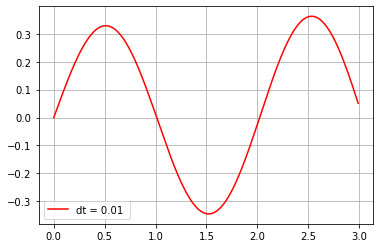

In [128]:
import matplotlib.pyplot as plt

g  = 9.8
L  = 1

#dos condiciones por que es un sistema de segundo orden
theta0  = 0
omega0 = 1


#numero de pasos
dt = 0.01
tiempos= np.arange(0, 3, dt)


N_pasos = len(tiempos)
 

theta = np.zeros(N_pasos)
omega = np.zeros(N_pasos)


theta[0]  = theta0
omega[0] =  omega0

 
#Usando el metodo de Euler
for i in range( N_pasos-1 ): 
    theta[i+1]  =  theta[i] + dt * omega[i]  
    omega[i+1]  =  omega[i] + dt * (- (g/L)*np.sin(theta[i]) ) 
  

#graficando el movimiento del pendulo
plt.plot(tiempos,         theta,'-r', label='dt = 0.01 ')
plt.grid()
plt.legend()
plt.show()
    

- Repetir el programa con un $dt$ mas pequeño

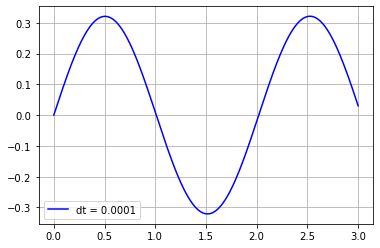

In [130]:
import matplotlib.pyplot as plt

g  = 9.8
L  = 1

#dos condiciones por que es un sistema de segundo orden
theta0  = 0
omega0 = 1


#numero de pasos
dt = 0.0001
tiempos2= np.arange(0, 3, dt)


N_pasos = len(tiempos2)
 

theta2 = np.zeros(N_pasos)
omega2 = np.zeros(N_pasos)


theta2[0]  = theta0
omega2[0] =  omega0

 
#Usando el metodo de Euler
for i in range( N_pasos-1 ): 
    theta2[i+1]  =  theta2[i] + dt * omega2[i]  
    omega2[i+1]  =  omega2[i] + dt * (- (g/L)*np.sin(theta2[i]) ) 
  

#graficando el movimiento del pendulo
plt.plot(tiempos2,         theta2,'-b', label='dt = 0.0001')
plt.grid()
plt.legend()
plt.show()

- comparando los dos graficos

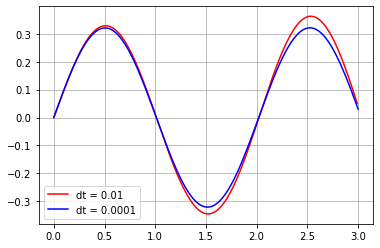

In [132]:
plt.plot(tiempos , theta ,'-r', label='dt = 0.01')
plt.plot(tiempos2, theta2,'-b', label='dt = 0.0001')
plt.grid()
plt.legend()
plt.show()

**NOTA :** Comentar el porque de la diferencia entre los dos graficos y enfatizar en el tamaño de paso.